In [136]:
import psutil
import subprocess
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

import seaborn as sns
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(11.7, 8.27)})
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt

In [137]:
def get_cpu_usage(name: str, ticks=10_000) -> pd.DataFrame:
    
    def get_pid(pstring):
        for line in os.popen("ps ax | grep " + pstring + " | grep -v grep"):
            fields = line.split()
            pid = fields[0]
            return int(pid)
        return 0
    
    pid = get_pid(name)
    if not pid:
        print('no pid for you, sorry')
        return 

    proc = psutil.Process(pid)
    sleep_sec = 0.01

    cpu_usage = []
    ts = []

    for i in range(ticks):
        try:
            ts.append(time.time())
            cpu_usage.append(proc.cpu_percent())
            time.sleep(sleep_sec)
        except KeyboardInterrupt:
            break
            
    df = pd.DataFrame({'cpu': cpu_usage}, index=pd.to_datetime(ts, unit='s'))
    df['cpu'] = df.cpu.rolling(3).sum() / 3
    df = df.clip(0, 100)
    ax = df.plot();
    ax.set_ylim(0, 110)
    ax.set_ylabel('cpu usage percent')
    ax.minorticks_on()
    return df

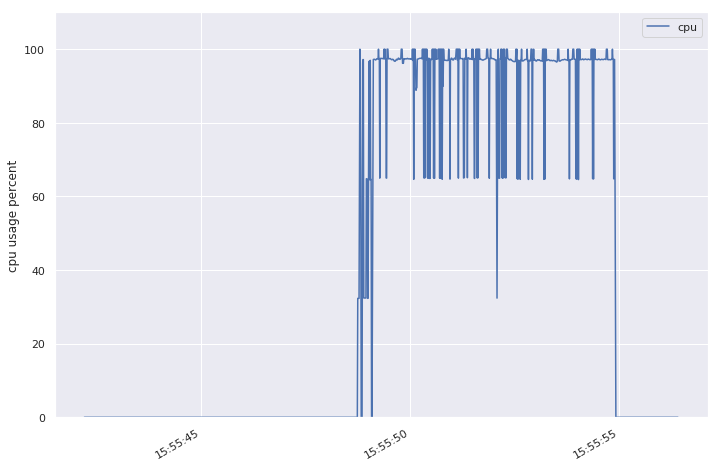

In [112]:
df1 = get_cpu_usage('./tornado_server.py')

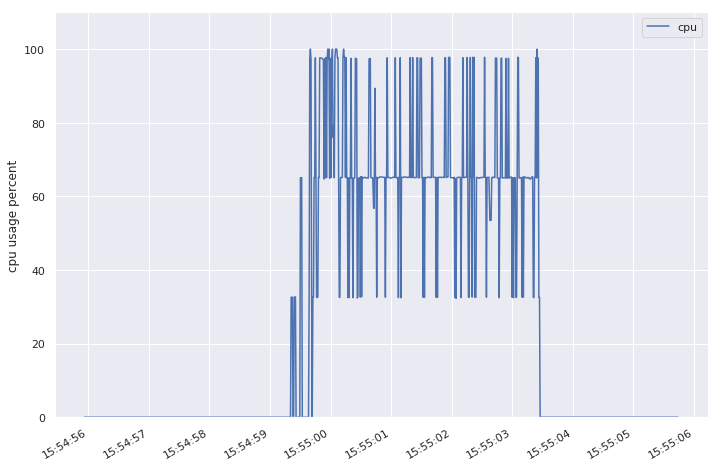

In [111]:
df2 = get_cpu_usage('./aiohttp_server.py')

In [ ]:
n = 50
cpu_tor = df1.cpu.rolling(n).sum() / n
aio_tor = df2.cpu.rolling(n).sum() / n

In [139]:
df = pd.DataFrame({
    'tornado_cpu': cpu_tor.reset_index(drop=True).iloc[400:].reset_index(drop=True),
    'aiohttp_cpu': aio_tor.reset_index(drop=True),
})

In [143]:
x = cpu_tor.reset_index(drop=True).dropna()
x = x[x > 0]

y = aio_tor.reset_index(drop=True).dropna()
y = y[y > 0]

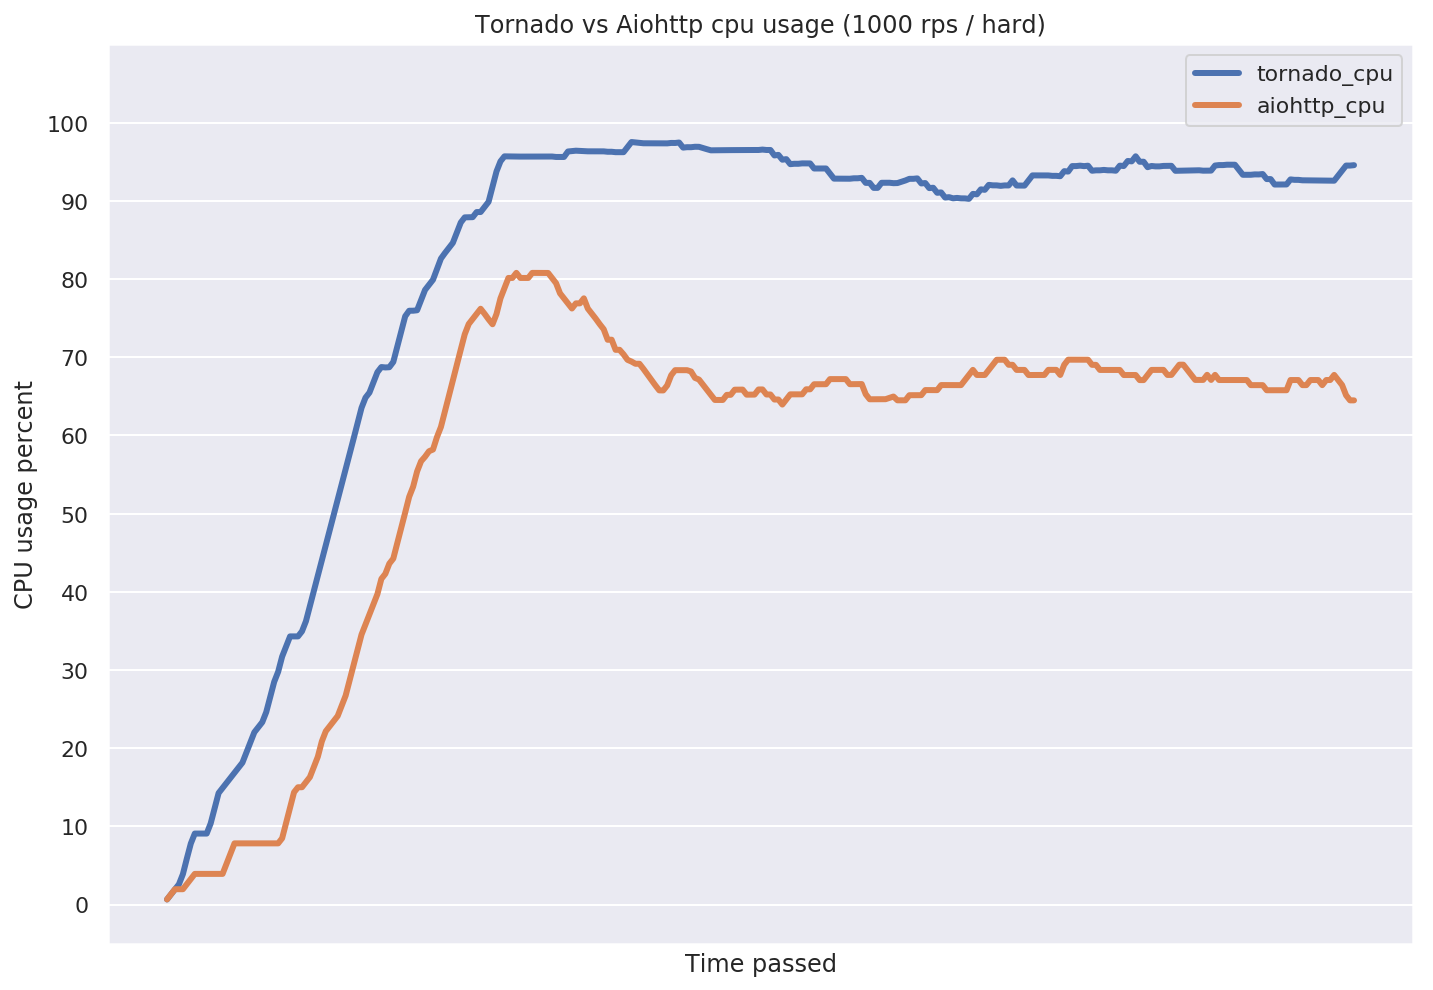

In [152]:
import numpy as np
df = pd.DataFrame({
    'tornado_cpu': x.reset_index(drop=True),
    'aiohttp_cpu': y.reset_index(drop=True),
})
df = df.iloc[:300]
a = df.plot(linewidth=3.0)
a.set_xticks([])
a.set_yticks(np.arange(0, 101, 10))

a.set_ylim(-5, 110)
a.set_ylabel('CPU usage percent')
a.set_xlabel('Time passed')
a.set_title('Tornado vs Aiohttp cpu usage (1000 rps / hard)');

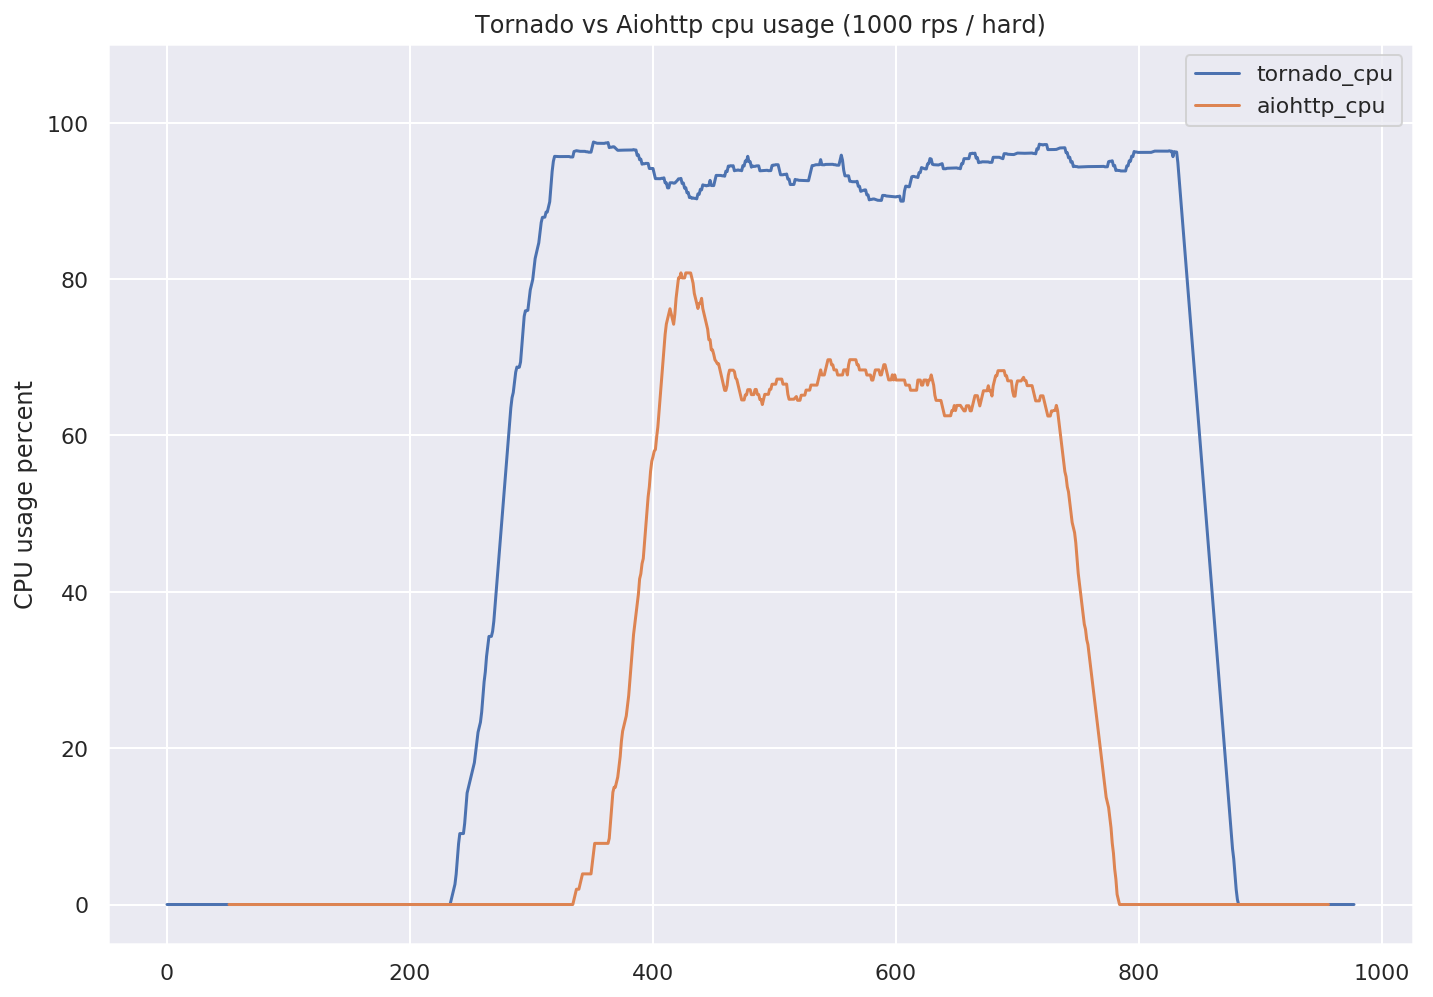

In [138]:
a = pd.DataFrame({
    'tornado_cpu': cpu_tor.reset_index(drop=True).iloc[400:].reset_index(drop=True),
    'aiohttp_cpu': aio_tor.reset_index(drop=True),
}).plot()


a.set_ylim(-5, 110)
a.set_ylabel('CPU usage percent')
a.set_title('Tornado vs Aiohttp cpu usage (1000 rps / hard)');